In [1]:
import stablemotifs
from colomoto_jupyter import tabulate

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-07-01`

Lets import the model from Zanudo et al. 2015 (DOI: 10.1371/journal.pcbi.1004571) and run the StableMotifs program

In [2]:
%time stm = stablemotifs.load("https://raw.githubusercontent.com/jgtz/StableMotifs/master/TLGLNetwork.txt")

Downloading https://raw.githubusercontent.com/jgtz/StableMotifs/master/TLGLNetwork.txt


Filename: colomotom3wzjo40TLGLNetwork.txt
Creating Boolean table directory: colomotom3wzjo40TLGLNetwork
Boolean table directory created.
Creating functions and names files.
Functions and names files created.
Performing network reduction...
Finding stable motifs in this network...
There are 4 stable motifs in this network: 
1/4	PDGFR=0	S1P=0	SPHK1=0	
2/4	P2=1	
3/4	TBET=1	
4/4	Ceramide=0	PDGFR=1	S1P=1	SPHK1=1	
There is 1 oscillating motif in this network that could display unstable or incomplete oscillations.
Performing network reduction using motif 1/5...
Performing network reduction using motif 2/5...
Performing network reduction using motif 3/5...
Performing network reduction using motif 4/5...
Performing network reduction using motif 5/5...
Network reduction complete.
Removing duplicate quasi-attractors.
Total number of quasi-attractors: 3
Number of putative quasi-attractors: 0
Total time for finding quasi-attractors: 162.08005729 s
Writing TXT files with quasi-attractors and stable

Lets display the quasi-attractors, which are compressed representations of the attractors (see Zanudo et al. 2015 for more details)

In [3]:
tabulate(stm.attractors)

,Cytoskeleton_signaling,Proliferation,Apoptosis,Stimuli2,Ceramide,Caspase,Stimuli,IL2RAT,IL2RBT,RANTES,IL2RB,IL2RA,BclxL,STAT3,IFNGT,PLCG1,PDGFR,ZAP70,SPHK1,CTLA4,TRADD,FasT,GRB2,PDGF,FasL,SOCS,GZMB,MCL1,SMAD,CREB,NFAT,FLIP,TPL2,CD45,TBET,GPCR,DISC,IFNG,NFKB,IL15,PI3K,sFas,Fas,JAK,IL2,BID,FYN,S1P,TCR,A20,ERK,IAP,GAP,LCK,MEK,P27,TNF,TAX,RAS,P2
2,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,0,1,X,0,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,X,1,1,1,0,1,1,1,1,0,1,0
1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,0,1,X,0,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,X,1,1,1,0,1,1,1,1,0,1,1
0,1,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,X,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,1,0,X,1,1,0,0,1,1,1,1,0,1,1


Lets now display the stable motifs

In [4]:
stm.stable_motifs

[{'PDGFR': 0, 'S1P': 0, 'SPHK1': 0},
 {'P2': 1},
 {'TBET': 1},
 {'Ceramide': 0, 'PDGFR': 1, 'S1P': 1, 'SPHK1': 1},
 {'ERK': 1, 'GRB2': 1, 'IL2RB': 1, 'IL2RBT': 1, 'MEK': 1, 'PI3K': 1, 'RAS': 1},
 {'Ceramide': 1, 'Fas': 1, 'S1P': 0, 'sFas': 0},
 {'P2': 0}]

As an example, lets show the reprogramming interventions towards each of the attractors in which Apoptosis=1. For our case there is only one such attractor:

In [5]:
s = stm.reprogramming_to_attractor(Apoptosis=1)
s

[FromAny(TemporaryPerturbation(PDGFR=0)),
 FromAny(TemporaryPerturbation(S1P=0)),
 FromAny(TemporaryPerturbation(SPHK1=0)),
 FromAny(TemporaryPerturbation(Ceramide=1, ERK=1, TBET=1)),
 FromAny(TemporaryPerturbation(Ceramide=1, GRB2=1, TBET=1)),
 FromAny(TemporaryPerturbation(Ceramide=1, IL2RB=1, TBET=1)),
 FromAny(TemporaryPerturbation(Ceramide=1, IL2RBT=1, TBET=1)),
 FromAny(TemporaryPerturbation(Ceramide=1, RAS=1, TBET=1)),
 FromAny(TemporaryPerturbation(Ceramide=1, MEK=1, PI3K=1, TBET=1))]

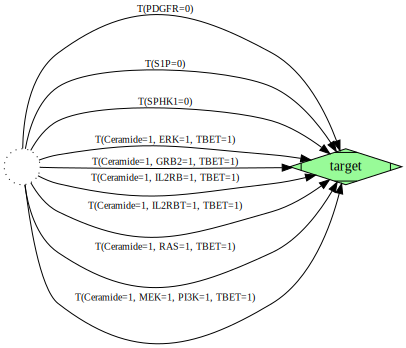

In [6]:
s.as_graph()

In [7]:
s.as_table()

,Ceramide,ERK,GRB2,IL2RB,IL2RBT,MEK,PDGFR,PI3K,RAS,S1P,SPHK1,TBET
0,,,,,,,,,,,0,
1,,,,,,,,,,0,,
2,,,,,,,0,,,,,
3,1,,,,,,,,1,,,1
4,1,,,,,1,,1,,,,1
5,1,,,,1,,,,,,,1
6,1,,,1,,,,,,,,1
7,1,,1,,,,,,,,,1
8,1,1,,,,,,,,,,1


As another example, lets show the reprogramming interventions towards each of the attractors in which Apoptosis=0. For this case we have two attractors that only differ in the state of P2.

In [8]:
s2 = stm.reprogramming_to_attractor(Apoptosis=0)
s2

[FromAny(TemporaryPerturbation(P2=1, S1P=1)),
 FromAny(TemporaryPerturbation(Ceramide=0, P2=1, PDGFR=1)),
 FromAny(TemporaryPerturbation(Ceramide=0, P2=1, SPHK1=1)),
 FromAny(TemporaryPerturbation(P2=0, S1P=1)),
 FromAny(TemporaryPerturbation(Ceramide=0, P2=0, PDGFR=1)),
 FromAny(TemporaryPerturbation(Ceramide=0, P2=0, SPHK1=1))]

Note that if the objective was to drive the system towards any attractor with Apoptosis=0, then fewer nodes are needed. Indeed, in Figure 4 of Zanudo et al. 2015 (DOI: 10.1371/journal.pcbi.1004571), both attractors with Apoptosis=0 are considered as a single type of attractor. The analysis of the stable motif succession diagram would give {S1P=1}, {Ceramide=0, PDGFR=1}, {Ceramide=0, SPHK1=1} as the reprogrammign interventions (see Table 1 in Zanudo et al. 2015). This would be equivalent to the interventions obtained in this notebook for Apoptosis=0 but without P2.